# Lab-04 Home

> Sai Prabhat Gubbala
> 21102442, DSAI

### ASSIGNMENT

Program -01 Text recognition from:
- Handwriting recognition
- Digit recognition using Digit Recognizer Data Science Project using MNIST Dataset.

Program -02: Write a menu-driven program to perform the following operations:
- Read the Image and change the original color like B\W -> to color or Colour -> B\W.
- Classification of Images based on objects.
- Object detection and write the name of the object.
- Image segmentation based on objects.
- Edge &amp; Contour Detection
- Text detection and recognition from input images.

### Handwritten Text Recognition

In [2]:
import numpy as np
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import requests

/home/ubuntu/miniconda3/envs/pt/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


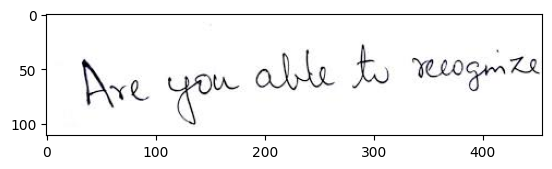

In [13]:
import cv2
import matplotlib.pyplot as plt
image=cv2.imread("handwritten-text-3.jpeg")
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [14]:
pixel_values = processor(images=image, return_tensors="pt").pixel_values
generated_ids = model.generate(pixel_values)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

In [15]:
print(generated_text)

Are you able to recognize


### Digit Recognition using MNIST Dataset

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [38]:
from tensorflow.keras.datasets import mnist
(trainx, trainy), (testx, testy) = mnist.load_data()

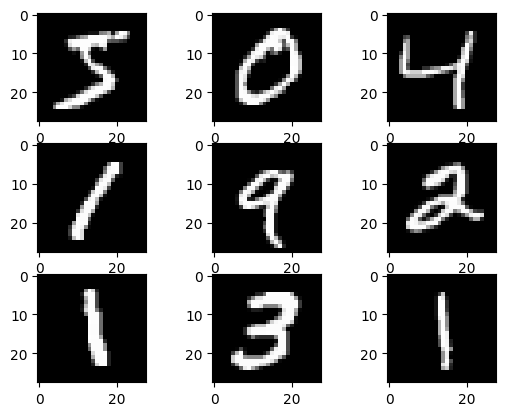

In [39]:
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(trainx[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [40]:
x_train = tf.keras.utils.normalize(trainx, axis = 1)
x_test = tf.keras.utils.normalize(testx, axis = 1)

In [41]:
import numpy as np
size=28
x_trainr = np.array(x_train).reshape(-1, size, size, 1)
x_testr = np.array(x_test).reshape(-1, size, size, 1)
print("Training Samples dimension", x_trainr.shape)
print("Testing Samples dimension", x_testr.shape)

Training Samples dimension (60000, 28, 28, 1)
Testing Samples dimension (10000, 28, 28, 1)


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

model=Sequential([Conv2D(64, (3,3), input_shape =(28,28,1),activation="relu"),
                 MaxPooling2D(pool_size=(2,2)),
                 Conv2D(64, (3,3),activation="relu"),
                 MaxPooling2D(pool_size=(2,2)),
                 Conv2D(64, (3,3),activation="relu"),
                 MaxPooling2D(pool_size=(2,2)),
                 Flatten(),
                 Dense(64,activation="relu"),
                 Dense(32,activation="relu"),
                 Dense(10,activation="softmax"),
                 ])

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 1, 1, 64)         

In [44]:
from tensorflow.keras.utils import to_categorical
model.compile(
 'adam',
 loss='categorical_crossentropy',
 metrics=['accuracy'],
)

In [45]:
model.save("digit_recognition.h5")

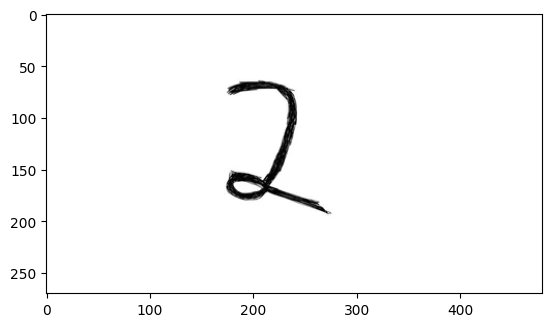

In [46]:
# Test Image

import cv2
img=cv2.imread("two.png")
img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap='gray')

In [47]:
image=tf.keras.utils.normalize(img, axis = 1)
image = cv2.resize(img, (28, 28))
image = np.array(image).reshape(-1, size, size, 1)
predictions = model.predict(image)
# Print our model's predictions.
print(np.argmax(predictions, axis=1))
# Check our predictions against the ground truths.
pred=list(predictions)

1/1 [==============================] - 0s 57ms/step
[2]


In [48]:
pred

[array([3.2097287e-16, 5.4700641e-16, 9.2564267e-01, 1.7043259e-09,
        6.4040325e-03, 1.9408668e-16, 6.7953296e-02, 9.4973538e-25,
        2.6737060e-10, 1.6140377e-14], dtype=float32)]

### Menu Driven Program

In [1]:
from ultralytics.utils.torch_utils import model_info_for_loggers
import cv2
from ultralytics import YOLO
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
model_classification = YOLO('yolov8l-cls.pt')
model_object = YOLO("yolov8l.pt")
model_segmentation = YOLO('yolov8l-seg.pt')
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')

/home/ubuntu/miniconda3/envs/pt/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 71.7M/71.7M [00:04<00:00, 15.1MB/s]
100%|██████████| 83.7M/83.7M [00:06<00:00, 12.9MB/s]
100%|██████████| 88.1M/88.1M [00:05<00:00, 16.2MB/s]
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def Black_and_white():
  name=input("Enter image name with extension: ")
  image=cv2.imread(name)
  img=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  return img

def classification():
  name=input("Enter image name with extension: ")
  results=model_classification.predict(name)
  return results


def object_classification():
  name=input("Enter image name with extension: ")
  results=model_object.predict(name)
  return results

def segmentation():
  name=input("Enter image name with extension: ")
  results=model_segmentation(name)
  return results

def edge_detection():
  name=input("Enter image name with extension: ")
  image=cv2.imread(name)
  grayscale_image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  grad_x = cv2.Sobel(grayscale_image, cv2.CV_64F,1,0)
  grad_y = cv2.Sobel(grayscale_image, cv2.CV_64F, 0, 1)
  grad = np.sqrt(grad_x**2 + grad_y**2)
  grad_norm = (grad * 255 / grad.max()).astype(np.uint8)
  return grad_norm

def text_detection():
  name=input("Enter image name with extension: ")
  image=cv2.imread(name)
  image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  pixel_values = processor(images=image, return_tensors="pt").pixel_values
  generated_ids = model.generate(pixel_values)
  generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
  return generated_text,image

Welcome to the AI Image playgame
-----------------------------------
1- Image to black and white
2- Image classification
3- Image segmentation
4- Object Detection
5- Edge Detection
6- Text Detection
-----------------------------------
0- To Quit


Selected Query 1: Image to black and white


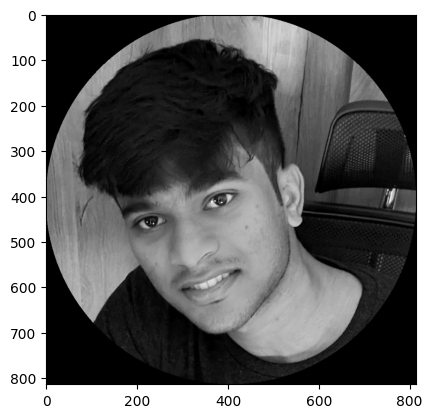

Selected Query 5: Edge Detection


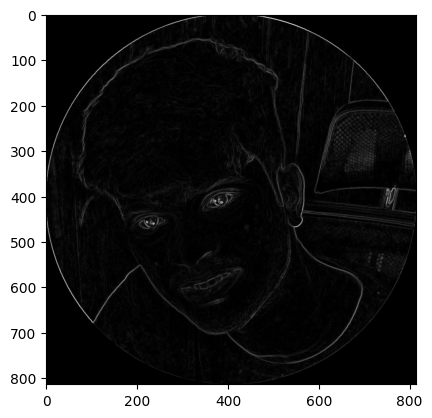

In [6]:
print("Welcome to the AI Image playgame")
print("-----------------------------------")
print("1- Image to black and white")
print("2- Image classification")
print("3- Image segmentation")
print("4- Object Detection")
print("5- Edge Detection")
print("6- Text Detection")
print("-----------------------------------")
print("0- To Quit\n\n")
import cv2
from time import sleep
query=2
while(query!=0):
  query=int(input("\n\n\nEnter The Task you want to perform:   "))
  if(query==1):
    print("Selected Query 1: Image to black and white")
    res=Black_and_white()
    plt.imshow(res,cmap="gray")
    plt.show()
    sleep(3)

  if(query==2):
    print("Selected Query 2: Image classification")
    res=classification()
    img=Image.fromarray(res[0].plot()[:,:,::-1])
    plt.imshow(img)
    plt.show()
    sleep(3)

  if(query==3):
    print("Selected Query 3: Image segmentation")
    res=segmentation()
    img=Image.fromarray(res[0].plot()[:,:,::-1])
    plt.imshow(img)
    plt.show()

  if(query==4):
    print("Selected Query 4: Object Detection")
    res=object_classification()
    img=Image.fromarray(res[0].plot()[:,:,::-1])
    plt.imshow(img)
    plt.show()
    sleep(3)

  if(query==5):
    print("Selected Query 5: Edge Detection")
    res=edge_detection()
    plt.imshow(res,cmap="gray")
    plt.show()
    sleep(3)


  if(query==6):
    print("Selected Query 6: Text Detection")
    res,img=text_detection()
    print("Decoded Text: ", res)
    plt.imshow(img)
    plt.show()
    sleep(3)